哈摟，各位資料科學家大家好，我是來自於台中市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四個城市110年第1季~第3季資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在12個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [ ]:
import pandas as pd 

In [ ]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
data_a_01 = pd.read_csv('A_lvr_land_A_11001.csv')
data_a_02 = pd.read_csv('A_lvr_land_A_11002.csv')
data_a_03 = pd.read_csv('A_lvr_land_A_11003.csv')

data_b_01 = pd.read_csv('B_lvr_land_A_11001.csv')
data_b_02 = pd.read_csv('B_lvr_land_A_11002.csv')
data_b_03 = pd.read_csv('B_lvr_land_A_11003.csv')

data_e_01 = pd.read_csv('E_lvr_land_A_11001.csv')
data_e_02 = pd.read_csv('E_lvr_land_A_11002.csv')
data_e_03 = pd.read_csv('E_lvr_land_A_11003.csv')

data_f_01 = pd.read_csv('F_lvr_land_A_11001.csv')
data_f_02 = pd.read_csv('F_lvr_land_A_11002.csv')
data_f_03 = pd.read_csv('F_lvr_land_A_11003.csv')

In [ ]:
data_a_01.columns

Index(['鄉鎮市區', '交易標的', '土地位置建物門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)',
       '車位總價元', '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯', '移轉編號'],
      dtype='object')

In [ ]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
data_a_01 = data_a_01.iloc[1:]
data_a_02 = data_a_02.iloc[1:]
data_a_03 = data_a_03.iloc[1:]

data_b_01 = data_b_01.iloc[1:]
data_b_02 = data_b_02.iloc[1:]
data_b_03 = data_b_03.iloc[1:]

data_e_01 = data_e_01.iloc[1:]
data_e_02 = data_e_02.iloc[1:]
data_e_03 = data_e_03.iloc[1:]

data_f_01 = data_f_01.iloc[1:]
data_f_02 = data_f_02.iloc[1:]
data_f_03 = data_f_03.iloc[1:]

In [ ]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
data_a_01['city'] = 'Taipei';data_a_02['city'] = 'Taipei';data_a_03['city'] = 'Taipei'
data_b_01['city'] = 'Taichung';data_b_02['city'] = 'Taichung';data_b_03['city'] = 'Taichung'
data_e_01['city'] = 'Kaohsiung';data_e_02['city'] = 'Kaohsiung';data_e_03['city'] = 'Kaohsiung'
data_f_01['city'] = 'New_Taipei';data_f_02['city'] = 'New_Taipei';data_f_03['city'] = 'New_Taipei'

In [ ]:
#4. 將以上四份資料運用pd.concat()串接
all_data_s01 = pd.concat([data_a_01,data_b_01,data_e_01,data_f_01],axis=0)
all_data_s02 = pd.concat([data_a_02,data_b_02,data_e_02,data_f_02],axis=0)
all_data_s03 = pd.concat([data_a_03,data_b_03,data_e_03,data_f_03],axis=0)
all_data_s01

,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號,city
1,文山區,房地(土地+建物),興隆路二段２１７巷８之７號五樓,8.65,都市：其他:第三種住宅區。,NaN,NaN,1091029,土地1建物1車位0,五層,十三層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,0850715,40.989999999999995,1,1,1,有,有,7300000,178092,NaN,0.0,0,陽台外推；其他增建；,RPWOMLKKJIPFFAA87DA,25.66,0.70,5.79,有,NaN,Taipei
2,文山區,房地(土地+建物),和平東路四段６５巷７７弄１號,86.0,都市：其他:第二種住宅區。,NaN,NaN,1091105,土地1建物1車位0,全,四層,透天厝,住家用,鋼筋混凝土造,0760413,175.72,5,4,3,有,有,24500000,139426,NaN,0.0,0,陽台外推；其他增建；,RPVPMLSKJIPFFAA68DA,133.66,35.95,6.11,無,NaN,Taipei
3,文山區,建物,羅斯福路六段２６巷２號,0.0,NaN,NaN,NaN,1091102,土地0建物1車位0,一層,四層,公寓(5樓含以下無電梯),見其他登記事項,加強磚造,0570614,79.57,4,1,1,有,無,8500000,106824,NaN,0.0,0,NaN,RPSOMLOLJIPFFAA97DA,79.57,0.00,0.00,無,NaN,Taipei
4,文山區,房地(土地+建物),興隆路四段１４５巷３６號四樓,33.62,都市：其他:第三種住宅區。,NaN,NaN,1091123,土地1建物1車位0,四層,四層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,NaN,106.21,3,2,2,有,無,11700000,110159,NaN,0.0,0,頂樓加蓋；,RPSNMLKMJIPFFAA57DA,89.45,0.00,16.76,無,1.0,Taipei
5,文山區,房地(土地+建物),興隆路三段１９２巷２弄２９號八樓,9.13,都市：其他:第三種住宅區。,NaN,NaN,1070309,土地1建物1車位0,八層,十層,華廈(10層含以下有電梯),見其他登記事項,鋼筋混凝土造,1090825,44.01,1,1,1,有,有,9000000,204499,NaN,0.0,0,NaN,RPWNMLQJKIPFFAA38DA,25.66,2.13,0.00,有,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14280,土城區,土地,永和段306地號,222.57,都市：其他:道路用地,NaN,NaN,1100220,土地5建物0車位0,NaN,NaN,其他,NaN,NaN,NaN,0.0,0,0,0,有,無,26105215,117290,NaN,0.0,0,NaN,RPRNMLNJLHGGFAF27DA,0.00,0.00,0.00,無,NaN,New_Taipei
14281,板橋區,房地(土地+建物),三民路二段２４１號九樓,10.23,都市：其他:住宅區,NaN,NaN,1100220,土地1建物1車位0,九層,十一層,住宅大樓(11層含以上有電梯),集合住宅,鋼筋混凝土造,1090929,70.1,2,1,1,有,有,10000000,142653,NaN,0.0,0,NaN,RPQUMLPLKHGGFAF18DA,42.80,1.24,3.09,有,NaN,New_Taipei
14282,板橋區,房地(土地+建物),三民路二段２３５號五樓,9.51,都市：其他:住宅區,NaN,NaN,1100220,土地1建物1車位0,五層,十一層,住宅大樓(11層含以上有電梯),集合住宅,鋼筋混凝土造,1090929,65.14,2,1,1,有,有,8870000,136168,NaN,0.0,0,NaN,RPRSMLPLKHGGFAF08DA,40.04,0.00,3.75,有,NaN,New_Taipei
14283,板橋區,房地(土地+建物),三民路二段２４１號十一樓,12.15,都市：其他:住宅區,NaN,NaN,1100220,土地1建物1車位0,十一層,十一層,住宅大樓(11層含以上有電梯),集合住宅,鋼筋混凝土造,1090929,83.62,2,1,1,有,有,12120000,144941,NaN,0.0,0,NaN,RPVSMLPLKHGGFAF48DA,48.36,0.74,7.12,有,NaN,New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在110年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在110年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [ ]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [ ]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
analysis_data_s01 = all_data_s01.rename(columns=columns_mapping)
analysis_data_s02 = all_data_s02.rename(columns=columns_mapping)
analysis_data_s03 = all_data_s03.rename(columns=columns_mapping)

In [ ]:
print(analysis_data_s01.shape)
print(analysis_data_s02.shape)
print(analysis_data_s03.shape)

(46153, 34)
(47436, 34)
(40374, 34)


In [198]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
analysis_data_s01= analysis_data_s01.loc[(analysis_data_s01.main_use=='住家用'),analysis_columns].dropna()
analysis_data_s02= analysis_data_s02.loc[(analysis_data_s02.main_use=='住家用'),analysis_columns].dropna()
analysis_data_s03= analysis_data_s03.loc[(analysis_data_s03.main_use=='住家用'),analysis_columns].dropna()
#analysis_data = analysis_data.loc[(analysis_data.main_use=='住家用'),analysis_columns].dropna()
# &(analysis_data.use_zoning=='%住%')
analysis_data_s01.info(),analysis_data_s02.info(),analysis_data_s03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405 entries, 0 to 3416
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        3405 non-null   object 
 1   towns                       3405 non-null   object 
 2   main_use                    3405 non-null   object 
 3   use_zoning                  3405 non-null   object 
 4   total_price                 3405 non-null   int64  
 5   building_area_square_meter  3405 non-null   float64
 6   main_building_area          3405 non-null   float64
 7   tx_dt                       3405 non-null   object 
 8   unit_price                  3405 non-null   float64
 9   room_number                 3405 non-null   int64  
 10  hall_number                 3405 non-null   int64  
 11  health_number               3405 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 345.8+ KB
<class 'pandas.core.frame.DataF

(None, None, None)

In [ ]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
analysis_data_s01.info()
analysis_data_s01 = analysis_data_s01.astype(columns_type)
analysis_data_s01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15964 entries, 1 to 14279
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        15964 non-null  object 
 1   towns                       15964 non-null  object 
 2   main_use                    15964 non-null  object 
 3   use_zoning                  15964 non-null  object 
 4   total_price                 15964 non-null  object 
 5   building_area_square_meter  15964 non-null  object 
 6   main_building_area          15964 non-null  float64
 7   tx_dt                       15964 non-null  object 
 8   unit_price                  15964 non-null  object 
 9   room_number                 15964 non-null  object 
 10  hall_number                 15964 non-null  object 
 11  health_number               15964 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
In

In [199]:
analysis_data_s02.info()
analysis_data_s02 = analysis_data_s02.astype(columns_type)
analysis_data_s02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16547 entries, 2 to 12436
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        16547 non-null  object 
 1   towns                       16547 non-null  object 
 2   main_use                    16547 non-null  object 
 3   use_zoning                  16547 non-null  object 
 4   total_price                 16547 non-null  object 
 5   building_area_square_meter  16547 non-null  object 
 6   main_building_area          16547 non-null  float64
 7   tx_dt                       16547 non-null  object 
 8   unit_price                  16547 non-null  object 
 9   room_number                 16547 non-null  object 
 10  hall_number                 16547 non-null  object 
 11  health_number               16547 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
In

In [200]:
analysis_data_s03.info()
analysis_data_s03 = analysis_data_s03.astype(columns_type)
analysis_data_s03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13582 entries, 1 to 13526
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        13582 non-null  object 
 1   towns                       13582 non-null  object 
 2   main_use                    13582 non-null  object 
 3   use_zoning                  13582 non-null  object 
 4   total_price                 13582 non-null  object 
 5   building_area_square_meter  13582 non-null  object 
 6   main_building_area          13582 non-null  float64
 7   tx_dt                       13582 non-null  object 
 8   unit_price                  13582 non-null  object 
 9   room_number                 13582 non-null  object 
 10  hall_number                 13582 non-null  object 
 11  health_number               13582 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
In

In [ ]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
analysis_data_s01['tx_dt_year'] = analysis_data_s01['tx_dt'].apply(lambda x: int(x[:-4]))
analysis_data_s01 = analysis_data_s01.loc[(analysis_data_s01.tx_dt_year>=110)&
                                  (analysis_data_s01.room_number>=1)&
                                  (analysis_data_s01.room_number<=5)&
                                  (analysis_data_s01.hall_number>=1)&
                                  (analysis_data_s01.hall_number<=2)]
analysis_data_s01 = analysis_data_s01.reset_index(drop=True)

In [203]:
analysis_data_s02['tx_dt_year'] = analysis_data_s02['tx_dt'].apply(lambda x: int(x[:-4]))
analysis_data_s02 = analysis_data_s02.loc[(analysis_data_s02.tx_dt_year>=110)&
                                  (analysis_data_s02.room_number>=1)&
                                  (analysis_data_s02.room_number<=5)&
                                  (analysis_data_s02.hall_number>=1)&
                                  (analysis_data_s02.hall_number<=2)]
analysis_data_s02 = analysis_data_s02.reset_index(drop=True)

In [204]:
analysis_data_s03['tx_dt_year'] = analysis_data_s03['tx_dt'].apply(lambda x: int(x[:-4]))
analysis_data_s03 = analysis_data_s03.loc[(analysis_data_s03.tx_dt_year>=110)&
                                  (analysis_data_s03.room_number>=1)&
                                  (analysis_data_s03.room_number<=5)&
                                  (analysis_data_s03.hall_number>=1)&
                                  (analysis_data_s03.hall_number<=2)]
analysis_data_s03 = analysis_data_s03.reset_index(drop=True)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [205]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
analysis_data_s01['building_area_square_feet'] = analysis_data_s01.building_area_square_meter*0.3025
analysis_data_s01['main_building_area_square_feet'] = analysis_data_s01.main_building_area*0.3025
analysis_data_s01['unit_price_square_feet'] = analysis_data_s01.unit_price/0.3025

analysis_data_s02['building_area_square_feet'] = analysis_data_s02.building_area_square_meter*0.3025
analysis_data_s02['main_building_area_square_feet'] = analysis_data_s02.main_building_area*0.3025
analysis_data_s02['unit_price_square_feet'] = analysis_data_s02.unit_price/0.3025

analysis_data_s03['building_area_square_feet'] = analysis_data_s03.building_area_square_meter*0.3025
analysis_data_s03['main_building_area_square_feet'] = analysis_data_s03.main_building_area*0.3025
analysis_data_s03['unit_price_square_feet'] = analysis_data_s03.unit_price/0.3025

In [ ]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
# 觀察到有總價total_price最小值為0還有主建物面積main_building_area最小為0的，進一步將其拿掉

analysis_data_s01.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,3.417000e+03,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.0,3417.000000,3417.000000,3.417000e+03
mean,1.179045e+07,119.102294,78.602248,100780.358502,2.750658,1.737782,1.683933,110.0,36.028444,23.777180,3.331582e+05
std,1.325205e+07,92.146826,40.912201,66605.400458,0.952557,0.439905,0.696396,0.0,27.874415,12.375941,2.201831e+05
min,6.700000e+04,1.240000,0.000000,0.000000,1.000000,1.000000,0.000000,110.0,0.375100,0.000000,0.000000e+00
25%,5.450000e+06,77.600000,54.600000,54485.000000,2.000000,1.000000,1.000000,110.0,23.474000,16.516500,1.801157e+05
50%,8.500000e+06,107.530000,76.000000,80250.000000,3.000000,2.000000,2.000000,110.0,32.527825,22.990000,2.652893e+05
75%,1.398000e+07,145.900000,93.860000,126801.000000,3.000000,2.000000,2.000000,110.0,44.134750,28.392650,4.191769e+05
max,2.933900e+08,3989.880000,715.900000,500204.000000,5.000000,2.000000,6.000000,110.0,1206.938700,216.559750,1.653567e+06


In [207]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
# 否
analysis_data_s01 = analysis_data_s01.loc[(analysis_data_s01.total_price!=0)&(analysis_data_s01.main_building_area!=0)&(analysis_data_s01.unit_price_square_feet!=0)]
analysis_data_s02 = analysis_data_s02.loc[(analysis_data_s02.total_price!=0)&(analysis_data_s02.main_building_area!=0)&(analysis_data_s02.unit_price_square_feet!=0)]
analysis_data_s03 = analysis_data_s03.loc[(analysis_data_s03.total_price!=0)&(analysis_data_s03.main_building_area!=0)&(analysis_data_s03.unit_price_square_feet!=0)]

analysis_data_s01.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,3.405000e+03,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.0,3405.000000,3405.000000,3.405000e+03
mean,1.180840e+07,119.262059,78.877706,100822.175624,2.750954,1.738326,1.684581,110.0,36.076773,23.860506,3.332964e+05
std,1.326806e+07,92.214250,40.719637,66682.666729,0.953811,0.439611,0.696904,0.0,27.894811,12.317690,2.204386e+05
min,6.700000e+04,1.240000,1.060000,4456.000000,1.000000,1.000000,0.000000,110.0,0.375100,0.320650,1.473058e+04
25%,5.480000e+06,77.650000,55.000000,54476.000000,2.000000,1.000000,1.000000,110.0,23.489125,16.637500,1.800860e+05
50%,8.500000e+06,107.590000,76.070000,80122.000000,3.000000,2.000000,2.000000,110.0,32.545975,23.011175,2.648661e+05
75%,1.400000e+07,145.980000,93.960000,126930.000000,3.000000,2.000000,2.000000,110.0,44.158950,28.422900,4.196033e+05
max,2.933900e+08,3989.880000,715.900000,500204.000000,5.000000,2.000000,6.000000,110.0,1206.938700,216.559750,1.653567e+06


In [209]:
analysis_data_s01.shape,analysis_data_s02.shape,analysis_data_s03.shape

((3405, 16), (13554, 16), (11732, 16))

In [211]:
analysis_data_s01.info(),analysis_data_s02.info(),analysis_data_s03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405 entries, 0 to 3416
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            3405 non-null   object 
 1   towns                           3405 non-null   object 
 2   main_use                        3405 non-null   object 
 3   use_zoning                      3405 non-null   object 
 4   total_price                     3405 non-null   int64  
 5   building_area_square_meter      3405 non-null   float64
 6   main_building_area              3405 non-null   float64
 7   tx_dt                           3405 non-null   object 
 8   unit_price                      3405 non-null   float64
 9   room_number                     3405 non-null   int64  
 10  hall_number                     3405 non-null   int64  
 11  health_number                   3405 non-null   int64  
 12  tx_dt_year                      34

(None, None, None)

# 4. 找出台中市時價登入總價高度相關的變數

阿宏我是台中人他想找出影響台中市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台中市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台中市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [212]:
# 阿宏我是台中人他想找出影響台中市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台中市的資料，並找出時價登入總價(total_price)高度相關的變數
# 建物移轉總面積平方公尺、主建物面積、建物移轉總面積坪、主建物面積坪
# 2. 資料切片切出city欄位為台中市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
# 單價元平方公尺
analysis_data_s01.loc[analysis_data_s01.city=='Taichung'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.465849
building_area_square_meter,0.426485,-0.050827
main_building_area,0.671099,-0.009201
unit_price,0.465849,1.000000
room_number,0.438292,0.068006
hall_number,0.394740,0.081986
health_number,0.511818,0.029976
tx_dt_year,NaN,NaN
building_area_square_feet,0.426485,-0.050827
main_building_area_square_feet,0.671099,-0.009201


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台中市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台中市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

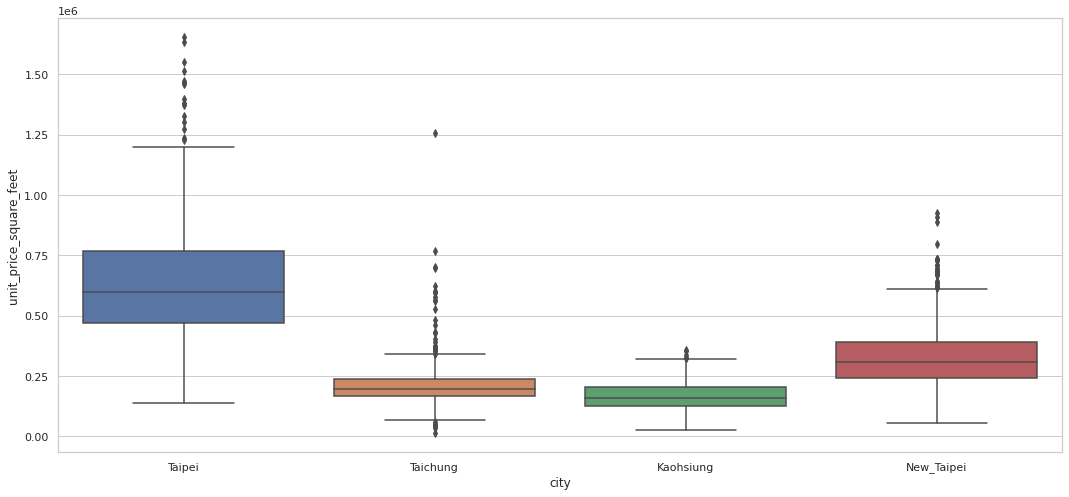

In [215]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
#台中市
import matplotlib.pyplot as plt
import seaborn as sns
#analysis_data_s01.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

fig=plt.figure(figsize=(18,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x="city",y="unit_price_square_feet",data=analysis_data_s01)


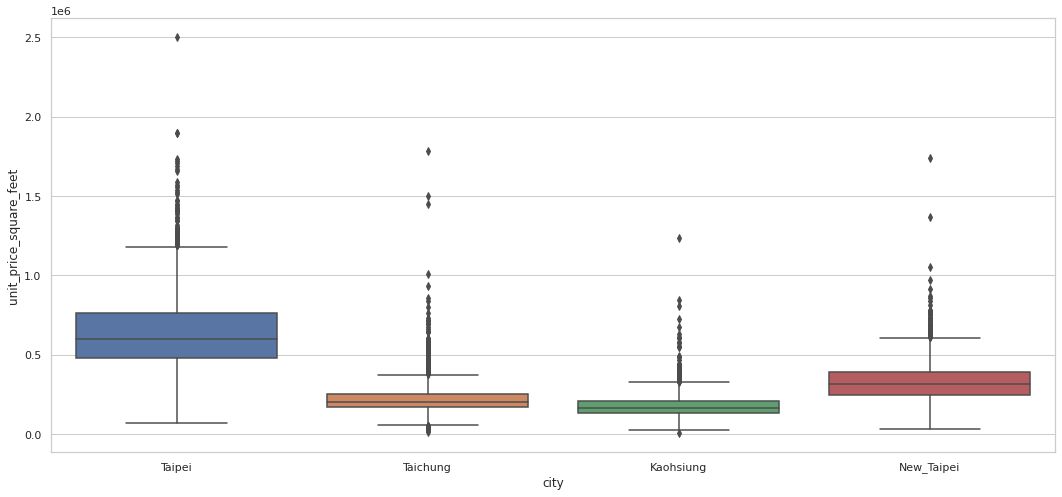

In [216]:
fig=plt.figure(figsize=(18,8))
sns.boxplot(x="city",y="unit_price_square_feet",data=analysis_data_s02)

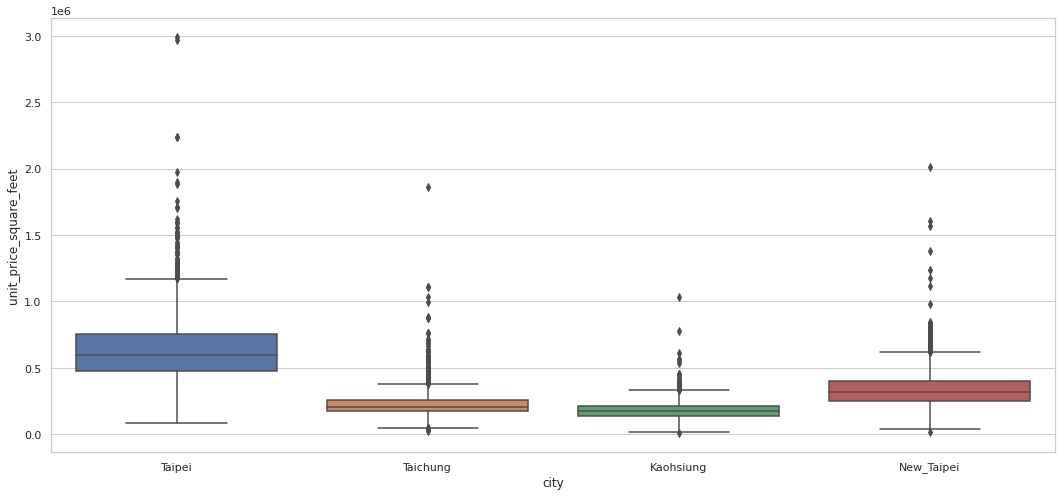

In [217]:
fig=plt.figure(figsize=(18,8))
sns.boxplot(x="city",y="unit_price_square_feet",data=analysis_data_s03)

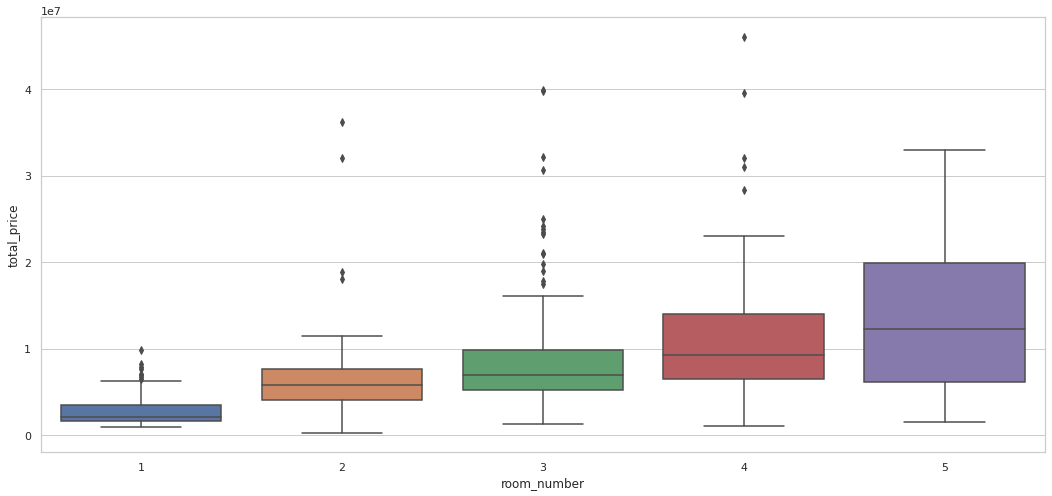

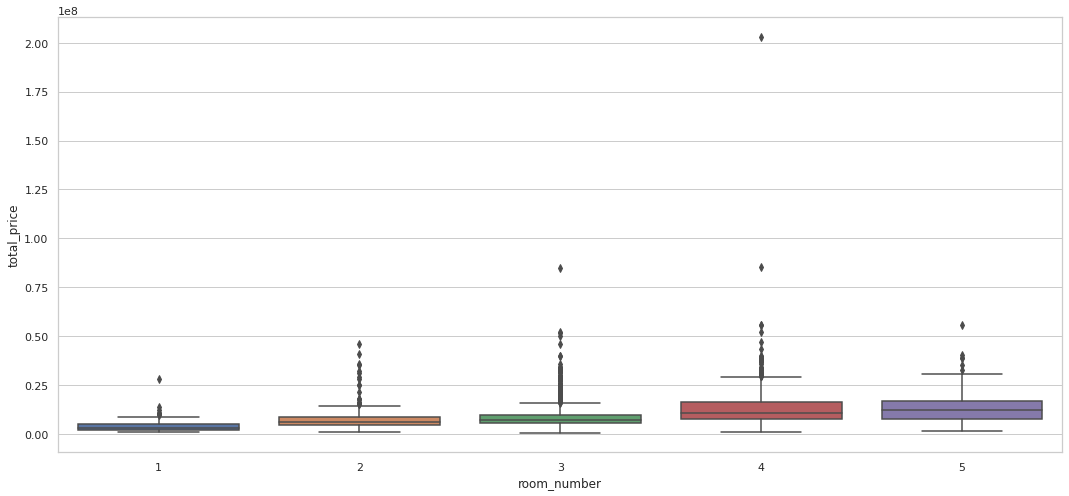

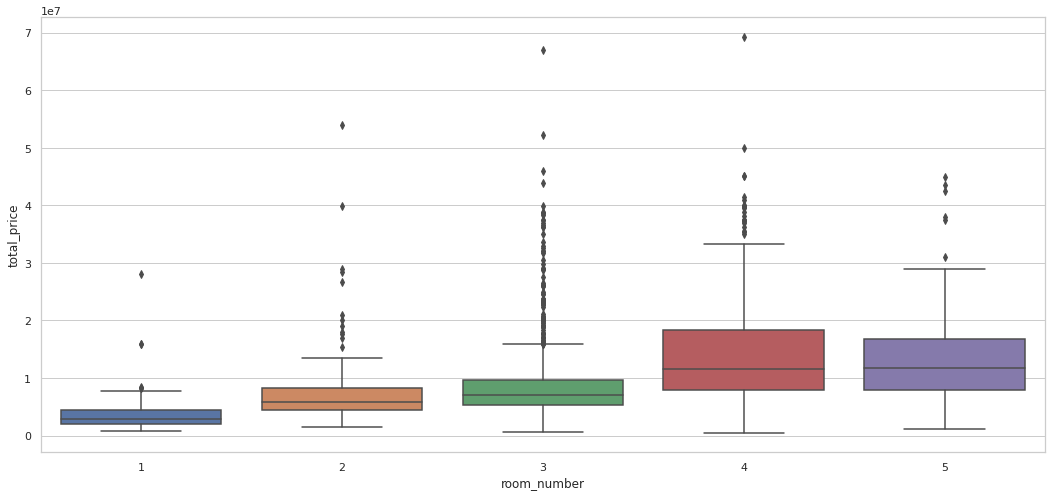

In [224]:
#2. 進一步對台中市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖

#analysis_data.loc[analysis_data.city=='Taichung'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))
fig=plt.figure(figsize=(18,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='room_number',y="total_price",data=analysis_data_s01.loc[analysis_data_s01.city=='Taichung'])

fig=plt.figure(figsize=(18,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='room_number',y="total_price",data=analysis_data_s02.loc[analysis_data_s02.city=='Taichung'])

fig=plt.figure(figsize=(18,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='room_number',y="total_price",data=analysis_data_s03.loc[analysis_data_s03.city=='Taichung'])

In [225]:
analysis_data_s01[analysis_data_s01.city=='Taichung'].groupby('towns').unit_price_square_feet.median().sort_values(ascending=False)

towns
太平區    258631.404959
大里區    245008.264463
南屯區    227753.719008
西屯區    219290.909091
后里區    198833.057851
西區     197801.652893
北屯區    195566.942149
潭子區    190561.983471
北區     190333.884298
豐原區    181760.330579
神岡區    178138.842975
大雅區    174337.190083
沙鹿區    172525.619835
東區     171709.090909
南區     170750.413223
中區     167381.818182
清水區    152176.859504
烏日區    148505.785124
大肚區    148158.677686
大甲區    127398.347107
龍井區    123804.958678
霧峰區    122614.876033
東勢區    103710.743802
梧棲區     92163.636364
Name: unit_price_square_feet, dtype: float64

In [227]:
analysis_data_s02[analysis_data_s02.city=='Taichung'].groupby('towns').unit_price_square_feet.median().sort_values(ascending=False)

towns
太平區    275469.421488
西屯區    237996.694215
南屯區    228105.785124
霧峰區    212634.710744
北屯區    203431.404959
西區     203302.479339
北區     200512.396694
后里區    199352.066116
大里區    195565.289256
南區     186966.942149
東區     181292.561983
豐原區    177856.198347
石岡區    174119.008264
潭子區    171355.371901
大雅區    170768.595041
神岡區    168133.884298
烏日區    162833.057851
沙鹿區    157300.826446
中區     154076.033058
龍井區    150403.305785
梧棲區    143910.743802
新社區    142952.066116
東勢區    118476.033058
清水區    116285.950413
大甲區    114066.115702
外埔區    102495.867769
大肚區    101623.140496
大安區     39685.950413
Name: unit_price_square_feet, dtype: float64

In [228]:
analysis_data_s03[analysis_data_s03.city=='Taichung'].groupby('towns').unit_price_square_feet.median().sort_values(ascending=False)

towns
后里區    258661.157025
西屯區    250975.206612
太平區    248983.471074
霧峰區    247634.710744
南屯區    228224.793388
烏日區    226664.462810
大里區    216347.107438
外埔區    211709.090909
西區     211061.157025
北屯區    206752.066116
北區     198441.322314
南區     183867.768595
東區     177980.165289
中區     175084.297521
潭子區    173844.628099
豐原區    172568.595041
大雅區    168647.933884
梧棲區    162479.338843
沙鹿區    159590.082645
龍井區    156882.644628
神岡區    149517.355372
石岡區    146519.008264
大肚區    122350.413223
東勢區    122201.652893
新社區    118938.842975
大甲區    117038.016529
清水區     91945.454545
Name: unit_price_square_feet, dtype: float64

In [237]:
#3. 對台中市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
#
from sklearn.preprocessing import LabelEncoder
le01 = LabelEncoder().fit(analysis_data_s01['towns'].values)
le02 = LabelEncoder().fit(analysis_data_s02['towns'].values)
le03 = LabelEncoder().fit(analysis_data_s03['towns'].values)
analysis_data_s01['towns_2'] = le01.transform(analysis_data_s01['towns'].values)
analysis_data_s02['towns_2'] = le02.transform(analysis_data_s02['towns'].values)
analysis_data_s03['towns_2'] = le03.transform(analysis_data_s03['towns'].values)

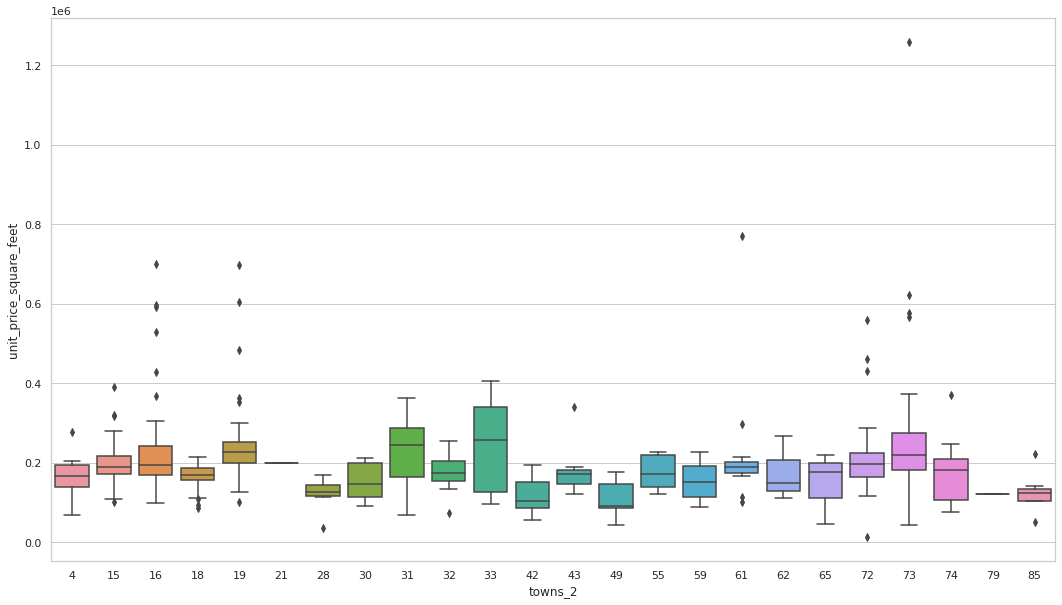

In [238]:
#analysis_data.loc[analysis_data.city=='Taichung'].boxplot(column=['unit_price_square_feet'],by='towns',figsize=(16,6))
#analysis_data_s01.loc[analysis_data_s01.city=='Taichung'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(16,6))

fig=plt.figure(figsize=(18,10))
sns.set_theme(style="whitegrid")
sns.boxplot(x='towns_2',y="unit_price_square_feet",data=analysis_data_s01.loc[analysis_data_s01.city=='Taichung'])

In [241]:
le01.inverse_transform([33]),le01.inverse_transform([31]),le01.inverse_transform([19])

(array(['太平區'], dtype=object),
 array(['大里區'], dtype=object),
 array(['南屯區'], dtype=object))

In [232]:
print("太平區中位數 坪數單價:",analysis_data_s01[(analysis_data_s01['towns']=='太平區')&(analysis_data_s01.city=='Taichung')].unit_price_square_feet.median())
print("大里區中位數 坪數單價:",analysis_data_s01[(analysis_data_s01['towns']=='大里區')&(analysis_data_s01.city=='Taichung')].unit_price_square_feet.median())
print("南屯區中位數 坪數單價:",analysis_data_s01[(analysis_data_s01['towns']=='南屯區')&(analysis_data_s01.city=='Taichung')].unit_price_square_feet.median())

太平區中位數 坪數單價: 258631.40495867768
大里區中位數 坪數單價: 245008.26446280992
南屯區中位數 坪數單價: 227753.71900826448


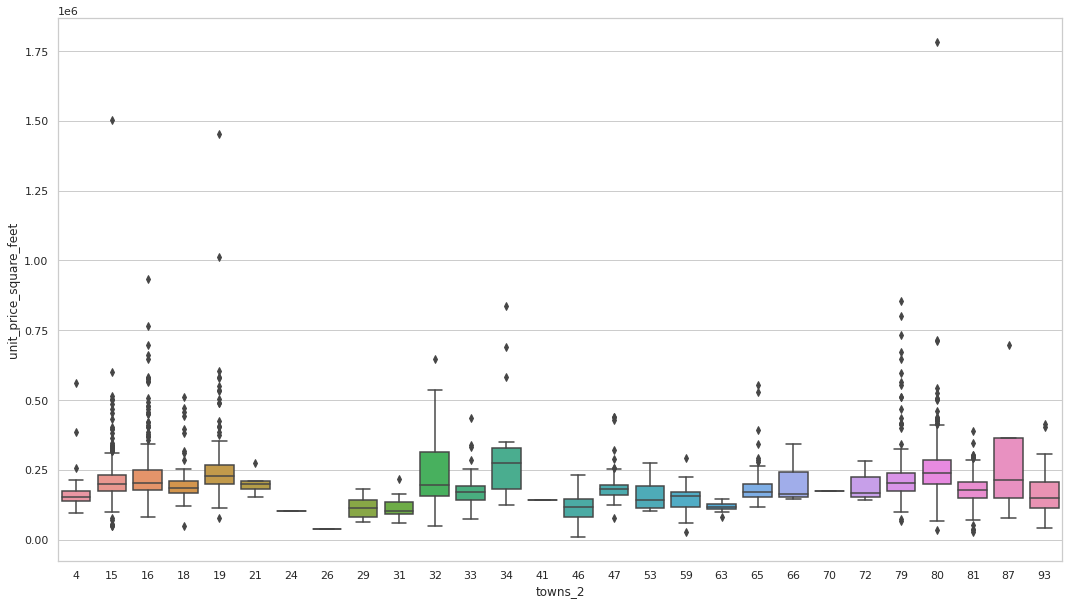

In [242]:
fig=plt.figure(figsize=(18,10))
sns.set_theme(style="whitegrid")
sns.boxplot(x='towns_2',y="unit_price_square_feet",data=analysis_data_s02.loc[analysis_data_s02.city=='Taichung'])

In [243]:
le02.inverse_transform([34]),le02.inverse_transform([80]),le02.inverse_transform([19])

(array(['太平區'], dtype=object),
 array(['西屯區'], dtype=object),
 array(['南屯區'], dtype=object))

In [245]:
print("太平區中位數 坪數單價:",analysis_data_s02[(analysis_data_s02['towns']=='太平區')&(analysis_data_s02.city=='Taichung')].unit_price_square_feet.median())
print("大里區中位數 坪數單價:",analysis_data_s02[(analysis_data_s02['towns']=='西屯區')&(analysis_data_s02.city=='Taichung')].unit_price_square_feet.median())
print("南屯區中位數 坪數單價:",analysis_data_s02[(analysis_data_s02['towns']=='南屯區')&(analysis_data_s02.city=='Taichung')].unit_price_square_feet.median())

太平區中位數 坪數單價: 275469.42148760334
大里區中位數 坪數單價: 237996.69421487604
南屯區中位數 坪數單價: 228105.78512396695


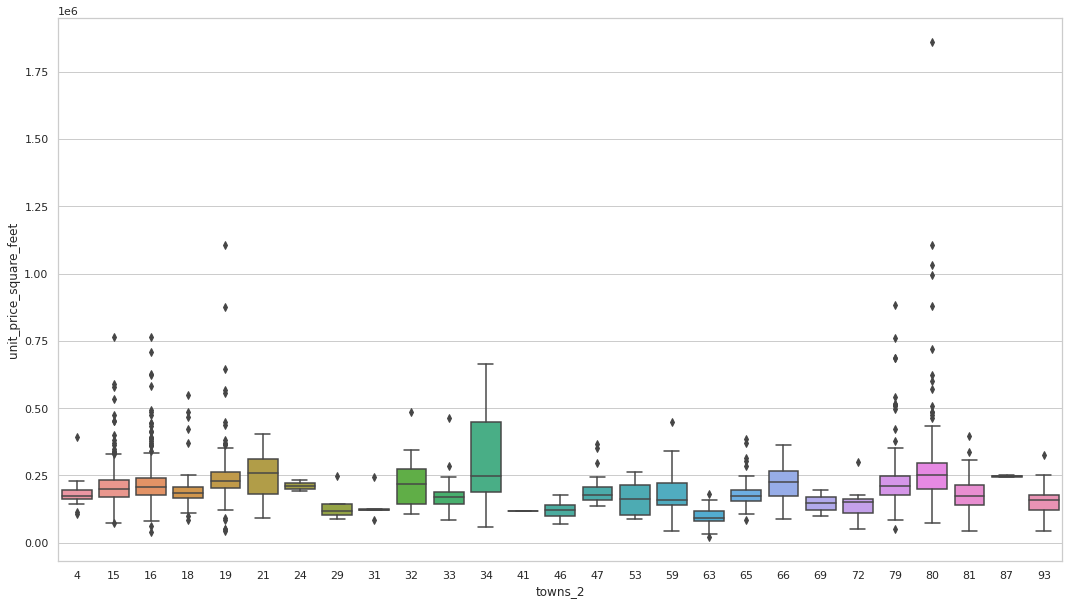

In [247]:
fig=plt.figure(figsize=(18,10))
sns.set_theme(style="whitegrid")
sns.boxplot(x='towns_2',y="unit_price_square_feet",data=analysis_data_s03.loc[analysis_data_s03.city=='Taichung'])

In [250]:
le03.inverse_transform([21]),le03.inverse_transform([80]),le03.inverse_transform([34])

(array(['后里區'], dtype=object),
 array(['西屯區'], dtype=object),
 array(['太平區'], dtype=object))

In [252]:
print("后里區中位數 坪數單價:",analysis_data_s03[(analysis_data_s03['towns']=='后里區')&(analysis_data_s03.city=='Taichung')].unit_price_square_feet.median())
print("西屯區中位數 坪數單價:",analysis_data_s03[(analysis_data_s03['towns']=='西屯區')&(analysis_data_s03.city=='Taichung')].unit_price_square_feet.median())
print("太平區中位數 坪數單價:",analysis_data_s03[(analysis_data_s03['towns']=='太平區')&(analysis_data_s03.city=='Taichung')].unit_price_square_feet.median())

后里區中位數 坪數單價: 258661.15702479339
西屯區中位數 坪數單價: 250975.20661157026
太平區中位數 坪數單價: 248983.47107438016
